### Section 1: Introduction

Briefly describe the classification problem and general data preprocessing. Note that some data preprocessing steps maybe specific to a particular algorithm. Report those steps under each algorithm section.


The performance of decision trees and naive bayes machine learning algorithms are compared in terms of accuracy for recognizing digits. 

In [43]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [44]:
train = pd.read_csv('Kaggle-digit-train.csv')

In [45]:
test = pd.read_csv('Kaggle-digit-test.csv')

In [46]:
X = train.iloc[:,1:].values
X.shape # these are the pixels belonging to image

(42000, 784)

Text(0.5, 1.0, 'Digit 4')

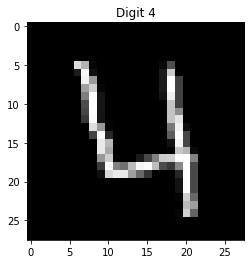

In [47]:
four = train.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [48]:
y = train.iloc[:,0].values
y.shape # these are the assigned labels that classify the images

(42000,)

In [49]:
X_test = test.iloc[:,1:].values
X_test.shape

(28000, 784)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
# For preprocessing, the  data is split into 90% training and 10% testing.
# shuffling gives different input of values for every model run 

### Section 2: Decision tree
Build a decision tree model. Tune the parameters, such as the pruning options, and report the 3-fold CV accuracy. 


\begin{equation}
\sum_{m=1}^M \sum_{x_i \in R_m} L(y_i, \hat{f}(x_i)) + \alpha M 
\end{equation}



In [51]:
from sklearn.tree import DecisionTreeClassifier 
classifer = DecisionTreeClassifier(criterion='entropy', max_depth=100)

Accuracy is computed by comparing the actual and predicted values. Tuning the parameters of the decision tree algorithm using 3 cross fold validation decreased the accuracy of the model. 

In [52]:
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy*100.0))

Accuracy: 86.17%


In [53]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=3, shuffle=True)
model_kfold = DecisionTreeClassifier(criterion='entropy', max_depth=100)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 86.10%


### Section 3: Naïve Bayes
Build a naïve Bayes model. Tune the parameters, such as the discretization options, to compare results. 

#### The Bayesian classifier

$$p(\text{hypothesis} \mid \text{data}) = \frac{p(\text{data} \mid \text{hypothesis})\;p(\text{hypothesis})}{p(\text{data})}$$

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy.mean()*100.0)) 

Accuracy: 56.73%


### Section 4: Algorithm performance comparison
Compare the results from the two algorithms. Which one reached higher accuracy? Which one runs faster? Can you explain why?

The decision tree model tuned with entropy has the highest accuracy at 85.74% 3-fold CV. The Gaussian Naive Bayes is much less accurate (56.39%) though faster to run. Whereas decision trees does not use probability, Naive Bayes has zero probability/frequency for missing attributes. Without smoothing the parameters, the prediction for posterior probability defaults to zero. The accuracies fluctuate with the shuffling of the training and testing data inputs, though compute the highest values overall. 

# KNN


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy.mean()*100.0))

Accuracy: 96.63%


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy.mean()*100.0))

Accuracy: 96.26%


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy.mean()*100.0))

Accuracy: 96.34%


# SVM

In [60]:
# linear model
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9098412698412699 



In [61]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9734920634920635 



In [64]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.971031746031746 



# Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7907936507936508

In [63]:
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.9415873015873016